In [ ]:
import shutil
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare File

In [ ]:
 def create_rows(file_path):

  search_text = "}{"
  replace_text = "},{"

  with open(file_path,'r+') as f:

		file = f.read()
		file = re.sub(search_text, replace_text, file)
		f.seek(0)
		f.write(file)

In [ ]:
def square_brackets(file_path):

    # Append ]
    f = open(file_path, "a")  # append mode
    f.write("]")
    f.close()

    with open(file_path, 'r') as f:
        original_content = f.read()

    # Prepend the new data
    new_content = "[" + original_content

    # Write the new content back to the file
    with open(file_path, 'w') as f:
        f.write(new_content)

In [ ]:
def pretty_print(file_path):

  with open(file_path, 'r') as f:
    data = json.loads(f.read())

  with open(file_path, 'w') as f:
    json.dump(data, f, indent=4)

In [ ]:
def copy_orginal_file(file_path_orginal, file_path_copy):
  shutil.copyfile(file_path_orginal, file_path_copy)

In [ ]:
def prepare_file(file_path_orginal, file_path_copy):

  # Prepare File

  copy_orginal_file(file_path_orginal, file_path_copy)
  create_rows('data_copy.json')
  square_brackets("data_copy.json")
  pretty_print("data_copy.json")

In [ ]:
file_path_orginal = "data.json"
file_path_copy = "data_copy.json"

prepare_file(file_path_orginal, file_path_copy)

# Extract Data

In [ ]:
def extract_data(input, taxi_group_name):

    result = []

    # taxi division
    rank = input["metadata"]["rank"]

    drivers = input["metadata"]["employee_data"]["driver_details"]

    for driver in drivers:
      row = []

      # Add required columns (frames)

      # taxi_group_name
      row.append(taxi_group_name)

      # rank
      row.append(rank)

      # driver profile
      #first_name
      row.append(driver["driver_profile"]["firstName"])

      #last_name
      row.append(driver["driver_profile"]["lastName"])

      # driver metrics
      #vehicle_brand
      row.append(driver["driver_metrics"]["vehicle_brand"])

      #driver_experience_group
      row.append(driver["driver_metrics"]["driver_experience_group"])

      #special_achievements_awarded
      row.append(driver["driver_metrics"]["special_achievements_awarded"])

      #driver_endurance_score
      row.append(driver["driver_metrics"]["driver_endurance_score"])

      #driver_profitabilty_score
      row.append(driver["driver_metrics"]["driver_profitabilty_score"])

      #driver_safety_adherence_score
      row.append(driver["driver_metrics"]["driver_safety_adherence_score"])

      #driving_efficiency_score
      row.append(driver["driver_metrics"]["driving_efficiency_score"])

      #number_of_1_star_ratings
      row.append(driver["driver_metrics"]["Number_of_1_star_ratings"])

      #number_of_2_star_ratings
      row.append(driver["driver_metrics"]["Number_of_2_star_ratings"])

      #number_of_3_star_ratings
      row.append(driver["driver_metrics"]["Number_of_3_star_ratings"])

      #number_of_4_star_ratings
      row.append(driver["driver_metrics"]["Number_of_4_star_ratings"])

      #number_of_5_star_ratings
      row.append(driver["driver_metrics"]["Number_of_5_star_ratings"])

      #extra columns
      #driver_id
      row.append(driver["driver_id"])

      #disabled
      row.append(driver["disabled"])

      #deleted
      row.append(driver["deleted"])

      result.append(row)

    # this if block iteratively processes
    # nodes that are identified in the input

    if "nodes" in input:
      for node in input["nodes"]:
        subresults = extract_data(node, taxi_group_name)

        # ensure nice flat list
        for subresult in subresults:
          result.append(subresult)
    else:
      print("No nodes in input")

    return result


In [ ]:
taxi_groups = []

with open(file_path_copy, 'r') as f:
  data = json.loads(f.read())

  for taxi_group in data:
    taxi_groups.append(taxi_group)

In [ ]:
rows = []
result = []

for taxi_group in taxi_groups:
  columns = []
  columns.append(taxi_group["taxi_group_name"])
  columns.append(taxi_group["taxi_org_data"]["depot_data"])
  rows.append(columns)

for row in rows:
  extracts = extract_data(row[1]["root"], row[0])

  for extract in extracts:
    result.append(extract)

# check
#print(len(result))


In [ ]:
# keeping the column names the same as the source data
# this could be changed easily enough

column_names = [
      'taxi_group_name',
      'rank',
      'first_name',
      'last_name',
      'vehicle_brand',
      'driver_experience_group',
      'special_achievements_awarded',
      'driver_endurance_score',
      'driver_profitabilty_score',
      'driver_safety_adherence_score',
      'driving_efficiency_score',
      'number_of_1_star_ratings',
      'number_of_2_star_ratings',
      'number_of_3_star_ratings',
      'number_of_4_star_ratings',
      'number_of_5_star_ratings',
      'driver_id',
      'disabled',
      'deleted'
]

In [ ]:
# Place data in pandas data frame

df=pd.DataFrame(result, columns = column_names)
df.head()

,taxi_group_name,rank,first_name,last_name,vehicle_brand,driver_experience_group,special_achievements_awarded,driver_endurance_score,driver_profitabilty_score,driver_safety_adherence_score,driving_efficiency_score,number_of_1_star_ratings,number_of_2_star_ratings,number_of_3_star_ratings,number_of_4_star_ratings,number_of_5_star_ratings,driver_id,disabled,deleted
0,"Walsh, Hammond and Craig",0,Bruce,Marshall,7,6,False,0.666398,-0.252875,0.279009,1.892210,9,38,40,20,22,f6e4b169-b46a-42e2-a867-aeb5a3504606,False,True
1,"Walsh, Hammond and Craig",1,Carol,Holmes,9,4,False,-1.177850,-1.560460,-1.211520,-0.510155,8,16,28,43,39,0dc2f8f6-cfc5-4b33-be82-9dbe1971186a,False,False
2,"Walsh, Hammond and Craig",1,Jay,Bailey,16,6,False,-0.557925,0.083300,0.596134,0.257793,5,12,25,39,26,88ce78cc-5843-48b7-8b2e-9b003060dbdd,False,False
3,"Walsh, Hammond and Craig",1,Aimee,Smith,3,4,False,-0.787186,-0.484124,0.966867,0.548890,8,8,16,52,34,968b5638-cea1-4f92-b926-2b19da8edbbf,False,True
4,"Walsh, Hammond and Craig",1,Hayley,Hall,14,1,False,0.518161,-0.108167,-0.025077,-0.133834,22,32,53,16,13,c0b889e0-faba-44dd-bf64-296b273e1e77,False,False


In [ ]:
# look at dtypes + non-null count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44061 entries, 0 to 44060
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taxi_group_name                44061 non-null  object 
 1   rank                           44061 non-null  int64  
 2   first_name                     44061 non-null  object 
 3   last_name                      44061 non-null  object 
 4   vehicle_brand                  44061 non-null  object 
 5   driver_experience_group        44061 non-null  object 
 6   special_achievements_awarded   44061 non-null  bool   
 7   driver_endurance_score         44061 non-null  float64
 8   driver_profitabilty_score      44061 non-null  float64
 9   driver_safety_adherence_score  44061 non-null  float64
 10  driving_efficiency_score       44061 non-null  float64
 11  number_of_1_star_ratings       44061 non-null  int64  
 12  number_of_2_star_ratings       44061 non-null 

## 1. Check for Missing Values:

Although df.info() shows that all columns are non-null, it's good practice to double-check for any hidden missing values (e.g., empty strings in object type columns).

In [ ]:
# look to see if any missing values
# confirms "Non-Null count" - i.e. no missing values

df.isna().sum()

taxi_group_name                  0
rank                             0
first_name                       0
last_name                        0
vehicle_brand                    0
driver_experience_group          0
special_achievements_awarded     0
driver_endurance_score           0
driver_profitabilty_score        0
driver_safety_adherence_score    0
driving_efficiency_score         0
number_of_1_star_ratings         0
number_of_2_star_ratings         0
number_of_3_star_ratings         0
number_of_4_star_ratings         0
number_of_5_star_ratings         0
driver_id                        0
disabled                         0
deleted                          0
dtype: int64

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## 2. Check for Duplicate Rows:

Check if there are any duplicate rows that may need to be removed.

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


Drop exact duplicates:

In [ ]:
df = df.drop_duplicates()

duplicate_rows = df_cleaned.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

NameError: name 'df_cleaned' is not defined

In [ ]:
unique_driver_ids = df['driver_id'].nunique()
total_driver_ids = len(df)
print(f"Unique driver IDs: {unique_driver_ids}, Total rows: {total_driver_ids}")

Unique driver IDs: 41971, Total rows: 43267


## Look into Category Fields

- Why are these dtypes object (strings)?
- Why is there a '0' category?

In [ ]:
for column in ['vehicle_brand', 'driver_experience_group']:
    print(f"{column} unique values:\n\n {df[column].unique()}\n")

vehicle_brand unique values:

 ['7' '9' '16' '3' '14' '8' '6' '4' '17' '12' '2' '11' '13' '15' '1' '0'
 '10' '5']

driver_experience_group unique values:

 ['6' '4' '1' '3' '2' '5']



In [ ]:
df['driver_experience_group'] = df['driver_experience_group'].astype('int64')
df['vehicle_brand'] = df['vehicle_brand'].astype('int64')

In [ ]:
for column in ['vehicle_brand', 'driver_experience_group']:
    print(f"{column} unique values:\n\n {df[column].unique()}\n")

vehicle_brand unique values:

 [ 7  9 16  3 14  8  6  4 17 12  2 11 13 15  1  0 10  5]

driver_experience_group unique values:

 [6 4 1 3 2 5]



In [ ]:
# Count the number of '0's in the vehicle_brand column
zero_count = (df['vehicle_brand'] == 0).sum()

print(f"Number of '0's in vehicle_brand column: {zero_count}")

Number of '0's in vehicle_brand column: 3594


Logical Sense

In [ ]:
for column in ['number_of_1_star_ratings', 'number_of_2_star_ratings', 'number_of_3_star_ratings', 'number_of_4_star_ratings', 'number_of_5_star_ratings']:
    if (df[column] < 0).any():
        print(f"Negative values found in {column}")

Negative values found in number_of_1_star_ratings
Negative values found in number_of_2_star_ratings
Negative values found in number_of_3_star_ratings
Negative values found in number_of_4_star_ratings
Negative values found in number_of_5_star_ratings


Negative values in columns that are supposed to represent counts or ratings is a data quality issue that needs to be addressed.

In [ ]:
# Identify rows with negative values
for column in ['number_of_1_star_ratings', 'number_of_2_star_ratings', 'number_of_3_star_ratings', 'number_of_4_star_ratings', 'number_of_5_star_ratings']:
    negative_rows = df[df[column] < 0]
    if not negative_rows.empty:
        print(f"Negative values found in {column}:")
        print(negative_rows[[column]].head())

Negative values found in number_of_1_star_ratings:
    number_of_1_star_ratings
22                        -3
39                        -1
76                        -1
90                        -1
91                        -1
Negative values found in number_of_2_star_ratings:
     number_of_2_star_ratings
43                         -1
108                        -1
188                        -2
240                        -2
355                        -2
Negative values found in number_of_3_star_ratings:
      number_of_3_star_ratings
962                         -2
1025                        -1
1331                        -3
1407                        -2
1714                        -2
Negative values found in number_of_4_star_ratings:
      number_of_4_star_ratings
7                           -2
443                         -2
986                         -2
1969                        -1
2086                        -3
Negative values found in number_of_5_star_ratings:
     number_of_5_st

it seems like the negative values represent errors or anomalies rather than actual data. In this case, blindly converting negative values to their positive counterparts may not be appropriate, as it would effectively hide these anomalies.

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

pd.options.mode.copy_on_write = True

In [ ]:
# Find negative rows for each column
for column in ['number_of_1_star_ratings', 'number_of_2_star_ratings', 'number_of_3_star_ratings', 'number_of_4_star_ratings', 'number_of_5_star_ratings']:
    negative_rows = df[df[column] < 0]

    # Check if there are negative rows in this column
    if not negative_rows.empty:
        # Interpolate missing values only for this column and update inplace using loc indexer
        df.loc[negative_rows.index, column] = negative_rows[column].interpolate(method='linear', inplace=True)



In [ ]:
# Identify rows with negative values
for column in ['number_of_1_star_ratings', 'number_of_2_star_ratings', 'number_of_3_star_ratings', 'number_of_4_star_ratings', 'number_of_5_star_ratings']:
    negative_rows = df[df[column] < 0]
    if not negative_rows.empty:
        print(f"Negative values found in {column}:")
        print(negative_rows[[column]].head())

# Check for Empty Cells

#### Findings
- There are no empty cells across the dataframe.

#### Conlusion
This makes the following fields OK:
- taxi_group_name


In [ ]:
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 1738


# Check Bool Columns

- special_achievements
- disabled
- deleted

In [ ]:
df.describe(include=[bool])

,special_achievements_awarded,disabled,deleted
count,43267,43267,43267
unique,2,2,2
top,False,False,False
freq,39674,42189,41168


####Findings:

1. All have values - no problem
2. Two unique values (true and false) - no problem
3. Both TRUEs and FALSEs represented in all - no problem
4. Disabled does not equal Deleted - no problem

####Conclusion:

- Columns seem healthy
- **NO** problems



#### Check for Outliers

If the maximum value significantly exceeds the 99% percentile value, or if the minimum value significantly falls below the 1% percentile value, it could indicate the presence of outliers.

In [ ]:
numeric_columns = ['driver_endurance_score',
                   'driver_profitabilty_score',
                   'driver_safety_adherence_score',
                   'driving_efficiency_score']

outliers = df[numeric_columns].describe(percentiles=[.01, .05, .95, .99])
print(outliers)

       driver_endurance_score  driver_profitabilty_score  \
count            43267.000000               43267.000000   
mean                 0.005064                   0.003184   
std                  1.002717                   0.999309   
min                 -2.756230                  -2.380450   
1%                  -1.790253                  -1.872420   
5%                  -1.274503                  -1.474481   
50%                 -0.107790                  -0.090173   
95%                  1.573785                   1.806400   
99%                  3.121250                   2.705508   
max                  7.380010                   3.521340   

       driver_safety_adherence_score  driving_efficiency_score  
count                   43267.000000              43267.000000  
mean                        0.000919                  0.002611  
std                         1.000847                  0.999023  
min                        -2.309580                 -2.278030  
1%            

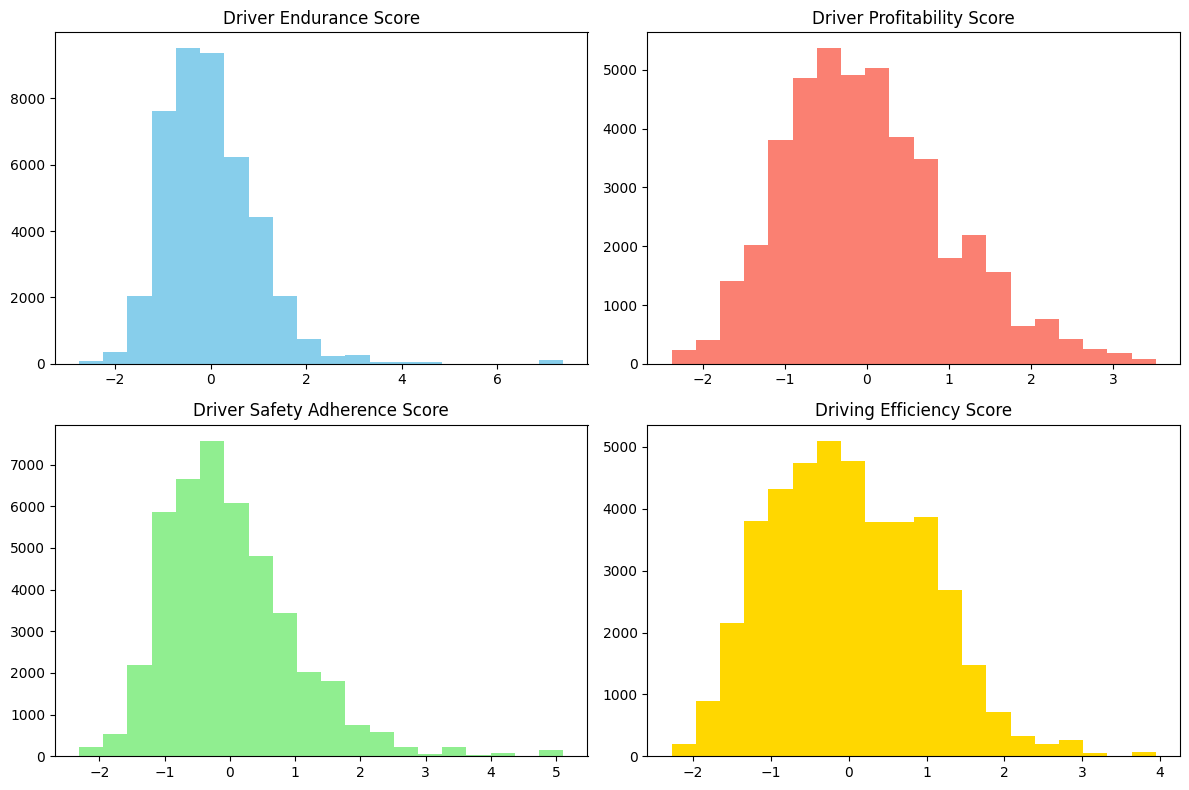

In [ ]:
# Plot histograms for each field
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df['driver_endurance_score'], bins=20, color='skyblue')
axs[0, 0].set_title('Driver Endurance Score')

axs[0, 1].hist(df['driver_profitabilty_score'], bins=20, color='salmon')
axs[0, 1].set_title('Driver Profitability Score')

axs[1, 0].hist(df['driver_safety_adherence_score'], bins=20, color='lightgreen')
axs[1, 0].set_title('Driver Safety Adherence Score')

axs[1, 1].hist(df['driving_efficiency_score'], bins=20, color='gold')
axs[1, 1].set_title('Driving Efficiency Score')

plt.tight_layout()
plt.show()

In [ ]:
# Columns to include in outlier detection
include_columns = ['driver_endurance_score', 'driver_profitabilty_score', 'driver_safety_adherence_score', 'driving_efficiency_score']

# Define a threshold for outliers (e.g., values beyond the 99th percentile)
threshold = 0.99

# Identify outliers for each specified column
outliers = {}
for column in include_columns:
    percentile_value = df[column].quantile(threshold)
    column_outliers = df[df[column] > percentile_value][[column]]
    outliers[column] = column_outliers

# Print outliers for each specified column
for column, outliers_df in outliers.items():
    print(f"Outliers for {column}:")
    print(outliers_df)
    print()

Outliers for driver_endurance_score:
       driver_endurance_score
309                   7.07849
467                   7.14649
657                   3.94768
748                   4.68885
943                   3.20957
...                       ...
43624                 7.22901
43732                 3.23418
43790                 7.27601
43794                 3.15020
43855                 7.18101

[433 rows x 1 columns]

Outliers for driver_profitabilty_score:
       driver_profitabilty_score
22                       3.17932
27                       2.70760
95                       2.76846
118                      2.72760
487                      3.29247
...                          ...
43737                    2.75778
43869                    3.04473
43874                    3.34347
43984                    2.88178
44011                    3.21209

[433 rows x 1 columns]

Outliers for driver_safety_adherence_score:
       driver_safety_adherence_score
45                           3.48331

In [ ]:
# Columns to include in outlier detection
include_columns = ['driver_endurance_score', 'driver_profitabilty_score', 'driver_safety_adherence_score', 'driving_efficiency_score']

# Define a threshold for outliers (e.g., values beyond the 99th percentile)
threshold = 0.99

# Identify outliers for each specified column and collect their indices
outlier_indices = set()
for column in include_columns:
    percentile_value = df[column].quantile(threshold)
    column_outliers = df[df[column] > percentile_value]
    outlier_indices.update(column_outliers.index)

# Convert the set of indices to a list
outlier_indices = list(outlier_indices)

# Filter the DataFrame to show only the rows with outliers
outliers_df = df.loc[outlier_indices]

# Check the number of unique values in the column driver_id for the outliers
unique_driver_ids = outliers_df['driver_id'].nunique()
print(f"Number of unique driver IDs in outliers: {unique_driver_ids}")


Number of unique driver IDs in outliers: 1620


In [ ]:
# Filter rows where first_name or last_name contain numbers
rows_with_numbers = df[df['first_name'].str.contains(r'\d', regex=True) | df['last_name'].str.contains(r'\d', regex=True)]

# Print the rows
print("Rows where first_name or last_name contain numbers:")
print(rows_with_numbers)

Rows where first_name or last_name contain numbers:
Empty DataFrame
Columns: [taxi_group_name, rank, first_name, last_name, vehicle_brand, driver_experience_group, special_achievements_awarded, driver_endurance_score, driver_profitabilty_score, driver_safety_adherence_score, driving_efficiency_score, number_of_1_star_ratings, number_of_2_star_ratings, number_of_3_star_ratings, number_of_4_star_ratings, number_of_5_star_ratings, driver_id, disabled, deleted]
Index: []


In [ ]:
# Create full_name column by concatenating first_name and last_name
df['full_name'] = df['first_name'] + ' ' + df['last_name']

# Remove first_name and last_name columns
df.drop(columns=['first_name', 'last_name'], inplace=True)

In [ ]:
df.head()

,taxi_group_name,rank,vehicle_brand,driver_experience_group,special_achievements_awarded,driver_endurance_score,driver_profitabilty_score,driver_safety_adherence_score,driving_efficiency_score,number_of_1_star_ratings,number_of_2_star_ratings,number_of_3_star_ratings,number_of_4_star_ratings,number_of_5_star_ratings,driver_id,disabled,deleted,full_name
0,"Walsh, Hammond and Craig",0,7,6,False,0.666398,-0.252875,0.279009,1.892210,9.0,38.0,40.0,20.0,22.0,f6e4b169-b46a-42e2-a867-aeb5a3504606,False,True,Bruce Marshall
1,"Walsh, Hammond and Craig",1,9,4,False,-1.177850,-1.560460,-1.211520,-0.510155,8.0,16.0,28.0,43.0,39.0,0dc2f8f6-cfc5-4b33-be82-9dbe1971186a,False,False,Carol Holmes
2,"Walsh, Hammond and Craig",1,16,6,False,-0.557925,0.083300,0.596134,0.257793,5.0,12.0,25.0,39.0,26.0,88ce78cc-5843-48b7-8b2e-9b003060dbdd,False,False,Jay Bailey
3,"Walsh, Hammond and Craig",1,3,4,False,-0.787186,-0.484124,0.966867,0.548890,8.0,8.0,16.0,52.0,34.0,968b5638-cea1-4f92-b926-2b19da8edbbf,False,True,Aimee Smith
4,"Walsh, Hammond and Craig",1,14,1,False,0.518161,-0.108167,-0.025077,-0.133834,22.0,32.0,53.0,16.0,13.0,c0b889e0-faba-44dd-bf64-296b273e1e77,False,False,Hayley Hall


In [ ]:
# Inspect the rank column
print("Summary statistics for 'rank' column:")
print(df['rank'].describe())

print("\nUnique values in 'rank' column:")
print(df['rank'].unique())

print("\nValue counts for 'rank' column:")
print(df['rank'].value_counts())

print("\nNumber of missing values in 'rank' column:")
print(df['rank'].isnull().sum())

Summary statistics for 'rank' column:
count    43267.000000
mean         2.316269
std          2.308201
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: rank, dtype: float64

Unique values in 'rank' column:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Value counts for 'rank' column:
rank
1     18399
2      7647
0      4222
3      3745
4      2665
5      2226
6      1663
7      1186
8       676
9       187
10      157
11      140
13       94
12       77
14       56
15       45
16       40
19       14
17       12
18        8
20        8
Name: count, dtype: int64

Number of missing values in 'rank' column:
0


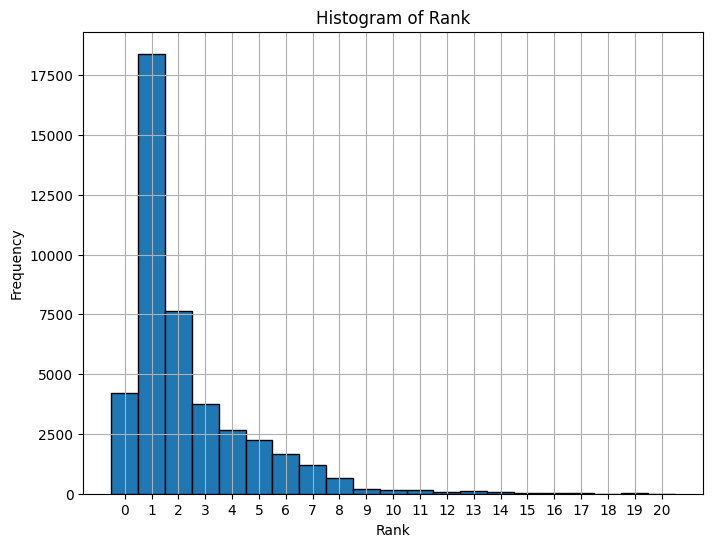

In [ ]:
# Draw a histogram of the rank column
plt.figure(figsize=(8, 6))
bins = np.arange(min(df['rank']) - 0.5, max(df['rank']) + 1.5, 1)
plt.hist(df['rank'], bins=bins, edgecolor='black')
plt.title('Histogram of Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(df['rank']), max(df['rank']) + 1, 1))
plt.grid(True)
plt.show()

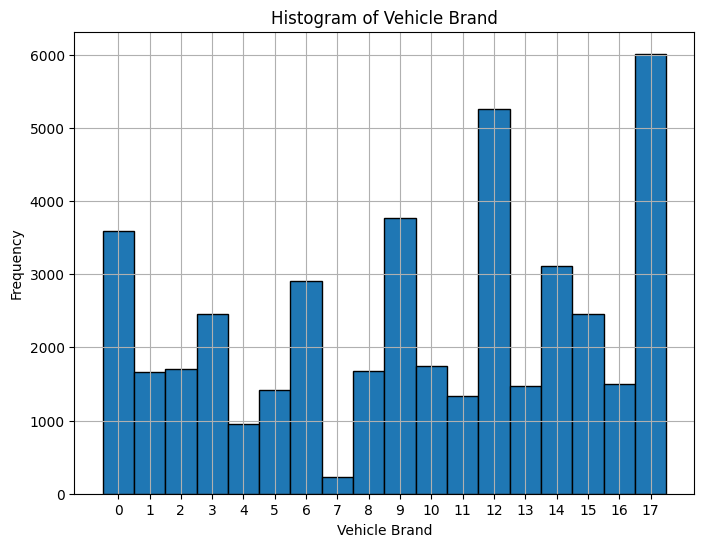

In [ ]:
# Draw a histogram of the rank column
plt.figure(figsize=(8, 6))
bins = np.arange(min(df['vehicle_brand']) - 0.5, max(df['vehicle_brand']) + 1.5, 1)
plt.hist(df['vehicle_brand'], bins=bins, edgecolor='black')
plt.title('Histogram of Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(df['vehicle_brand']), max(df['vehicle_brand']) + 1, 1))
plt.grid(True)
plt.show()

In [ ]:
# Remove columns 'driver_id', 'disabled', and 'deleted' from the DataFrame
df.drop(columns=['driver_id', 'disabled', 'deleted'], inplace=True)

In [ ]:
df.head()

,taxi_group_name,rank,vehicle_brand,driver_experience_group,special_achievements_awarded,driver_endurance_score,driver_profitabilty_score,driver_safety_adherence_score,driving_efficiency_score,number_of_1_star_ratings,number_of_2_star_ratings,number_of_3_star_ratings,number_of_4_star_ratings,number_of_5_star_ratings,full_name
0,"Walsh, Hammond and Craig",0,7,6,False,0.666398,-0.252875,0.279009,1.892210,9.0,38.0,40.0,20.0,22.0,Bruce Marshall
1,"Walsh, Hammond and Craig",1,9,4,False,-1.177850,-1.560460,-1.211520,-0.510155,8.0,16.0,28.0,43.0,39.0,Carol Holmes
2,"Walsh, Hammond and Craig",1,16,6,False,-0.557925,0.083300,0.596134,0.257793,5.0,12.0,25.0,39.0,26.0,Jay Bailey
3,"Walsh, Hammond and Craig",1,3,4,False,-0.787186,-0.484124,0.966867,0.548890,8.0,8.0,16.0,52.0,34.0,Aimee Smith
4,"Walsh, Hammond and Craig",1,14,1,False,0.518161,-0.108167,-0.025077,-0.133834,22.0,32.0,53.0,16.0,13.0,Hayley Hall


In [ ]:
# Define the desired order of columns
desired_columns_order = [
    'taxi_group_name', 'rank', 'full_name', 'vehicle_brand', 'driver_experience_group',
    'special_achievements_awarded', 'driver_endurance_score', 'driver_profitabilty_score',
    'driver_safety_adherence_score', 'driving_efficiency_score',
    'number_of_1_star_ratings', 'number_of_2_star_ratings', 'number_of_3_star_ratings',
    'number_of_4_star_ratings', 'number_of_5_star_ratings'
]

# Reorder the columns of the DataFrame
df = df.reindex(columns=desired_columns_order)

In [ ]:
df.head()

,taxi_group_name,rank,full_name,vehicle_brand,driver_experience_group,special_achievements_awarded,driver_endurance_score,driver_profitabilty_score,driver_safety_adherence_score,driving_efficiency_score,number_of_1_star_ratings,number_of_2_star_ratings,number_of_3_star_ratings,number_of_4_star_ratings,number_of_5_star_ratings
0,"Walsh, Hammond and Craig",0,Bruce Marshall,7,6,False,0.666398,-0.252875,0.279009,1.892210,9.0,38.0,40.0,20.0,22.0
1,"Walsh, Hammond and Craig",1,Carol Holmes,9,4,False,-1.177850,-1.560460,-1.211520,-0.510155,8.0,16.0,28.0,43.0,39.0
2,"Walsh, Hammond and Craig",1,Jay Bailey,16,6,False,-0.557925,0.083300,0.596134,0.257793,5.0,12.0,25.0,39.0,26.0
3,"Walsh, Hammond and Craig",1,Aimee Smith,3,4,False,-0.787186,-0.484124,0.966867,0.548890,8.0,8.0,16.0,52.0,34.0
4,"Walsh, Hammond and Craig",1,Hayley Hall,14,1,False,0.518161,-0.108167,-0.025077,-0.133834,22.0,32.0,53.0,16.0,13.0


In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('output.csv', index=False)